# Klasifikacija slika cvijeća koristeći keras pretrenirani model InceptionV3

Seminarski rad obuhvaća predobradbu i klasifikaciju slika cvijeća upotrebom dubokog učenja i korištenjem pretrenirane konvolucijske neuronske mreže nad setom podataka Flower Recognition dataset koji se može pronaći na [linku](https://www.kaggle.com/alxmamaev/flowers-recognition) 

Flower Recognition dataset sadrži 4326 slike cvijeća. Prikupljanje podataka temelji se na podacima flicr, google i yandex slika.
Slike su podijeljene u pet klasa: kamilica, tulipan, ruža, suncokret i maslačak. Za svaku klasu postoji oko 800 slika. Slike nisu visoke rezolucije, otprilike 320x240 piksela. Međutim, nisu sve slike 320x240 piksela, već variraju. 

Upotreba pretreniranih modela spada pod domenu tzv. engl. _Transfer Learning_. Transfer learning je problem strojnog učenja koji se bazira na pohranjivanje znanja dobivenog rješavanjem jednog problema, te primjenom znanja na drugi, ali srodni problem.Na primjer, znanje stečeno pri strojnom učenju prepoznavanja automobila može se primijeniti pri prepoznavanju kamiona. Kako bih prikazali prednosti transfer learninga prikazali smo analogiju ljudske evolucije. Prije nego što je jezik izmišljen, svaka je generacija ljudi morala nanovo izmisliti znanje za sebe, i tako se odvijao rast znanja od jedne generacije do druge. 

<img src="files/1.png">
Onda je izmišljen jezik. Način prijenosa učenja iz jedne generacije u drugu, i evo što se dogodilo unutar istog vremenskog perioda.
<img src="files/2.png">

Slika prikazuje koliko je prijenos učenja ubrzao proces rasta znanja iz generacije u generaciju.

Inception mreža je važan iskorak u razvoju CNN (engl. _Convolutional neural network_) klasifikatora. Prije Inceptiona najpopularniji CNN klasifikatori su samo slagali slojeve sve dublje i dublje nadajući se postizanju bolje izvedbe. S druge strane, Inception mreža je kompleksna, te koristi puno trikova kako bih poboljšala učinkovitost, kako u smislu brzine izvođenja tako i točnosti. Kontinuirana evolucija mreže dovela je do nekoliko popularnih verzija: Inception v1.
                             Inception v2 i Inception v3
                             Inception v4 i Inception-ResNet.
Svaka verzija je poboljšana verzija prethodne. Razumijevanje nadogradbi pomaže pri izgradnji prilagođenih klasifikatora koji su optimizirani sa strane brzine i točnosti. Ovisno o podatcima korištenim, prijašnja inačica zapravo može raditi bolje.Pošto smo ograničeni računalnim resursima,a koristimo poprilično velik skup podataka u ovom seminarskom radu odlučeno je koristiti Inception v3 zbog bržeg vremena izvođenja korištenjem Batch normalizacije u pomoćnim klasifikatorima.

## Pretrenirani modeli

Pretrenirani model je model koji je stvorio netko drugi za rješavanje sličnog problema.  Umjesto izgradnje modela od nule, koristi se model istreniran za drugi problem kao polaznu točku.
Na primjer, ako želite izgraditi auto koji sam uči. Možete provesti godine da biste izgradili pristojan algoritam prepoznavanja slike od početka ili možete preuzeti Inception model tvrtke Google koji je izgrađen na ImageNet podatcima kako bi se identificirale značajke na slikama.

Pretrenirani model nije uvijek 100% točan, ali štedi iznimne napore potrebne za izgradnju učenja od nule. U ovom seminarskom radu pretrenirani model koristi se u svrhu izvlačenja značajki. To činimo tako da uklonimo izlazni sloj, a zatim na njega nadovezujemo neuronsku mrežu u svrhu fiksnog izvlačenja značajki za novi skup podataka. Na taj način pretrenirani model vežemo s novim modelom koji treniramo nad novim podatcima.

Postoje tri načina za fino prilagođavanje modela. To su :
1. Izvlačenje značajki
2. Korištenje arhitekture pretreniranog modela
3. Treniranje samo pojedinih slojeva modela

Koji način ćemo odabrati ovisi o sličnosti podataka i veličini skupa podataka.
<img src="files/3.png">

Dakle ukoliko je veličina skupa podataka mala, a sličnost podataka velika možemo fino prilagoditi samo izlazni sloj pretreniranog modela. Ukoliko je veličina skupa podataka mala a također i sličnost podataka tada je potrebno trenirati samo gornje slojeve pretreniranog modela, dok donje slojeve ne mijenjamo. Na taj način gornji slojevi se prilagođavaju novom skupu podataka. Ukoliko je veličina skupa podataka velika, a sličnost podataka malena pretrenirani model nije efektivan i potrebno je izgraditi mrežu od početka. Ukoliko je veličina skupa podataka velika, a tako i sličnost između podataka to je idealni slučaj i pretrenirani model je najefikasniji, a potrebno mu je zadržati strukturu i trenirati  model s inicijalnim težinama.

## Programsko rješenje

Programski kod napisan u programskom jeziku python izvršavao se uz pomoć grafičkog procesora (engl. _Graphic processing unit_), tzv. GPU. Kako bih koristili GPU u svrhu izvršavanja programskog koda računalo mora posjedovati grafičku karticu proizvođača NVIDIA koja posjeduje podršku za programiranje GPU-a imenom CUDA. CUDA je paralelna računalna platforma i programski model koji je izumljen od tvrtke NVIDIA. Omogućava dramatično poboljšanje performansi računalnog sustava iskorištavanjem snage grafičkog procesora. Sama CUDA nije dovoljna za rad s dubokim učenjem koristeći grafički procesor, već je potrebno skinuti biblioteku cuDNN (engl. _NVIDIA CUDA Deep Neural Network library_). cuDNN je biblioteka grafičkog procesora koja sadržava osnovne stavke za rad s dubokim neuronskim mrežama. Pruža visoko prilagođene implementacije za standardne rutine kao što su unaprijedna i unazadna konvolucija, normalizacija, aktivacijski slojevi i slično.

Programski kod napisan je u Python 3.6 programskom jeziku na Anaconda distribuciji. Kreiran je "Anaconda environment" koji sadrži IDE Spyder, Jupyter, Tensorflow, Keras, Matplotlib, Scikit-learn i mnoge druge alate potrebne za rad s dubokim neuronskim mrežama.

In [4]:
#Korištene biblioteke u programu
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from keras.regularizers import l2
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Input, Flatten, BatchNormalization, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.applications import InceptionV3
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [5]:
#Učitavanje i prikaz svih podataka sadržanih u datasetu
flowers_path = "flowers/"
flower_types = os.listdir(flowers_path)
print("Tipovi cvijeća pronađeni: ", len(flower_types))
print("Kategorije cvijeća: ", flower_types)

Tipovi cvijeća pronađeni:  5
Kategorije cvijeća:  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [11]:
# Kreiranje liste cvijeca
flowers = []

for species in flower_types:
    # Dohvaćanje svih imena datoteka
    all_flowers = os.listdir(flowers_path + species)
    # Dodavanje imena na listu
    for flower in all_flowers:
        flowers.append((species, str(flowers_path + species) + '/' + flower))


In [15]:
# Generiranje dataframea     
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
flowers.head()

category                                       image
0    daisy    flowers/daisy/100080576_f52e8ee070_n.jpg
1    daisy    flowers/daisy/10140303196_b88d3d6cec.jpg
2    daisy  flowers/daisy/10172379554_b296050f82_n.jpg
3    daisy    flowers/daisy/10172567486_2748826a8b.jpg
4    daisy  flowers/daisy/10172636503_21bededa75_n.jpg

In [16]:
# Ispis broja slika po kategoriji dataseta
print("Ukupni broj cvijeća u skupu podataka: ", len(flowers))
fl_count = flowers['category'].value_counts()
print("Broj cvijeća po kategorijama: ")
print(fl_count)

Ukupni broj cvijeća u skupu podataka:  4326
Broj cvijeća po kategorijama: 
dandelion    1055
tulip         984
rose          784
daisy         769
sunflower     734
Name: category, dtype: int64


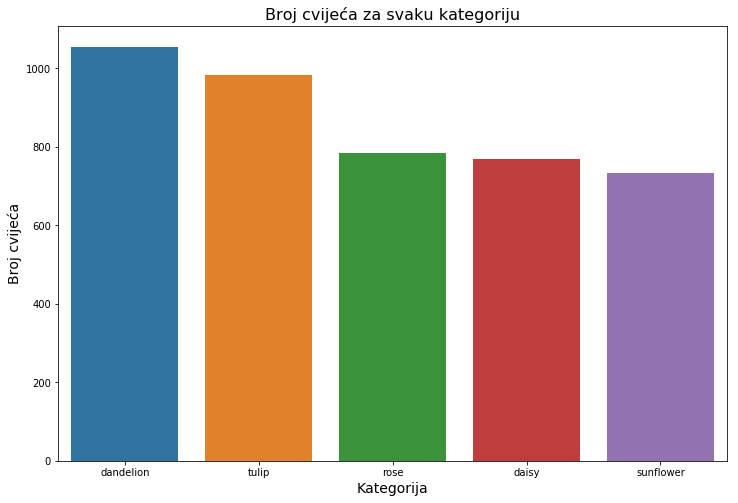

In [98]:
# Prikaz barplot dataseta
plt.figure(figsize=(12,8))
sns.barplot(x=fl_count.index, y=fl_count.values)
plt.title("Broj cvijeća za svaku kategoriju", fontsize=16)
plt.xlabel("Kategorija", fontsize=14)
plt.ylabel("Broj cvijeća", fontsize=14)
plt.show()

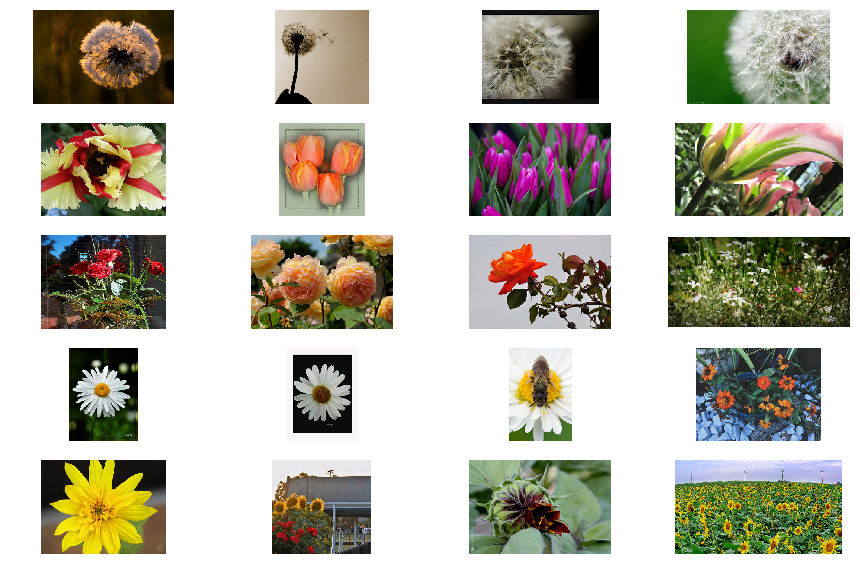

In [99]:
#Vizualizacija dataseta
# Lista za dohvaćanje random slika iz dataseta
random_samples = []

# Dohvaćanje 4 uzorka iz svake kategorije 
for category in fl_count.index:
    samples = flowers['image'][flowers['category'] == category].sample(4).values
    for sample in samples:
        random_samples.append(sample)

# Prikaz uzoraka
f, ax = plt.subplots(5,4, figsize=(15,10))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(mimg.imread(random_samples[i]))
    ax[i//4, i%4].axis('off')
plt.show()   

In [18]:
# Izgradnja generatora skupova podataka

batch_size = 50
# Postavke za generator train skupa podataka
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Postavka za generator test skupa podataka
test_datagen = ImageDataGenerator(rescale=1./255)

Kako bih koristili Kerasov ImageDataGenerator za generiranje batcheva tenzorskih podataka potrebno je skup podataka organizirati na train, test i validation foldere unutar kojih se nalaze slike sortirane po klasama unutar pripadajućih foldera. ImageDataGenerator je vrlo moćan alat za predobradu podataka za učenje. 

Batch_size je parametar koji nam definira broj uzoraka koji će propagirati kroz mrežu. Prednosti manjeg batcha su manji zahtjevi za memorijom i veća brzina učenja. Međutim ukoliko je batch_size malen, veća je pogreška preciznosti procjene gradijenta.

Train skup podataka skaliramo na vrijednosti između 0 i 1 (vrijednosti slike od 0-255). Postavljamo shear_range i zoom_range na 0.2. Za velike i kompleksne probleme poboljšanje učenja možemo postići okretanjem slike horizontalno ili vertikalno, što je korisno činiti kod objekata na sceni koji mogu imati različite orijentacije.

Test skup podataka je potrebno samo skalirati, pošto se podatci nekoriste pri učenju.

In [19]:
#Train generator koji dohvaća slike u subfolderima train skupa 
train_generator = train_datagen.flow_from_directory(
        'organizeflowersdataset/change_flowers/train',
        target_size=(300, 300),  # cropa sve slike na 300x300
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical',# više klasa
        shuffle=True)  

Found 3000 images belonging to 5 classes.


Train generator učitava fotografije iz train foldera te skalira sve slike na 300 x 300 piksela. Koristi prethodno zadani batch_size, označava RGB mod boja, definira višeklasni mod i ispremješta podatke. Višeklasni mod dijeli podatke u klase prema folderima u kojima se podatci nalaze, zbog toga je bilo potrebno podatke podijeliti po folderima skupa podataka prema njihovim klasama.

In [20]:
#Validation generator koji dohvaća slike u subfolderima validation skupa
validation_generator = test_datagen.flow_from_directory(
        'organizeflowersdataset/change_flowers/validation',
        target_size=(300,300),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical',
        shuffle=True)

Found 911 images belonging to 5 classes.


Validation generator radi isto što i train_generator samo sa manje podataka (911).
Validacijski skup podataka je skup primjera korištenih za namještanje parametara klasifikatora prilikom učenja. Recimo kod MLP klasifikatora koristimo validacijski set kako bih pronašli optimalni broj skirvenih jedinica, ili kako bih definirali točku zaustavljanja za backprop algoritam.

In [22]:
#Test generator koji dohvaća slike u subfolderima validation skupa
test_generator=test_datagen.flow_from_directory(
        'organizeflowersdataset/change_flowers/test',
        target_size=(300,300),
        color_mode='rgb',
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')

Found 911 images belonging to 5 classes.


### Izgradnja modela 

In [104]:
def get_model():
    # Dohvaćanje baznog modela InceptionV3
    base_model = InceptionV3(include_top=False, input_shape=(300,300,3))
    # Sprječava učenje layera Inceptionv3 pretreniranog modela
    for layer in base_model.layers:
        layer.trainable = False
    
    # Dodavanje novih slojeva na InceptionV3 model
    x = Flatten()(base_model.output)
    x = Dense(100, name='Dense_layer1',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dense(100, name='Dense_layer2',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dense(5, activation='softmax', name='classification_layer')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    # Kompajliranje modela koristeći SGD optimizer
   # opt = SGD(lr=1e-3, momentum=0.9)
    opt=Adam(lr=5e-3, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #Sažetak
    model.summary()
    return model

Kao bazni model koristimo pretrenirani model InceptionV3 koji je sadržan unutar Keras API-ja. Osim InceptionV3 pretreniranog modela može se koristiti i Xception, VGG16, ResNet50, MobileNet i dr. Svi ti modeli zajedno sa svojstvenim težinama sadržani su unutar Keras API-ja. Ne uzimamo zadnji sloj InceptionV3 modela, a prvi sloj postavljamo kao ulazni sloj dimenzija 300x300x3, gdje je 300x300 veličina slike a x3 predstavlja boju (RGB).

Pošto želimo zadržati značajke pretreniranog modela moramo sprječiti ponovno učenje slojeva tog modela, to se u literaturi još i naziva zamrzavanje slojeva. Nadalje potrebno je izgraditi povrh InceptionV3 mreže Flatten() sloj neuronske mreže koji prethodni sloj (3,3,2048) pretvara u (18432). Iz višedimenzionalnog poravnava ulaz u jednodimenzionalni prostor, po tome i dobiva ime Flatten(). Na Flatten() sloj veže se Dense() sloj koji sadrži 100 neurona i ne koristi bias parametar, zbog Batch normalizacije u sljedećem sloju koja uvelike ubrzava vrijeme učenja. Na prvi Dense sloj veže se drugi sloj s 100 neurona. Dense sloj je gusto zbijeni osnovni sloj neuronske mreže koji provodi operaciju: output = activation(dot(input, kernel) + bias). Gdje activation predstavlja aktivacijsku funkciju proslijeđenu kao aktivacijski argument, kernel je matrica težina kreirana od strane sloja, a bias je vektor generiran od strane sloja (samo ukoliko je use_bias=True).

Da bi se povećala stabilnost neuronske mreže, batch normalizacija normalizira izlaz prethodnog aktivacijskog sloja oduzimanjem batch srednje vrijednosti i dijeljenjem sa batch standardnom devijacijom. Nadalje batch normalizacija dodaje dva parametra koja se mogu trenirati svakom sloju,  tako da se normalizirani izlaz množi sa standardnom devijacijom (gamma parametar) i srednjom vrijednošću (beta parametar). Drugim riječima, batch normalizacija dozvoljava optimizatoru (SGD,Adam i sl.) denormalizaciju promjenom samo te dvije težine za svaku aktivaciju, umjesto  gubitka stabilnosti mreže promjenom svih težina. Osim toga batch normalizacija dozvoljava svakom sloju mreže da uči sam od sebe malo više neovisno o drugim slojevima. Možemo koristiti veće faktore učenja, te smanjuje se overfitting na podatke. Koristimo linearnu aktivacijsku funkciju u predzadnjem sloju mreže, dok zadnji sloj mreže ima neurona koliko ima klasa, a kao aktivacijsku funkciju koristi softmax. 

ReLu funkcija daje izlaz x ako je x pozitivan, u suprotnom vraća nulu. A(x) = max(0,x).

<img src="files/4.png">

ReLu je nelinearna funkcija po prirodi, te kombinacije su također ne linearne i vrlo dobro aproksimira bilikoju funkciju. To je bitno iz razloga što korištenjem Relu aktivacijske funkcije možemo slagati slojeve, što kod korištenja linearne funkcije nije moguće. Mana ove funkcije je što nije ograničena ([0,inf]). Također zbog horizontalne linije gradijent može ići prema 0. Za aktivacije u tom dijelu ReLu funkcije gradijent će biti  0 zbog čega težine neće biti prepravljene prilikom spusta. Iz čega slijedi da ti neuroni će prestati reagirati na varijacije u pogrešci i ulazu (zbog toga što je gradijent 0, ništa se ne mijenja). Ovo se naziva engl. _dying ReLu_ problem, koji može dovesti do smrti nekolicine neurona što čini dobar dio mreže pasivnim. Nadalje ReLu se sastoji od manje kompleksnih računskih operacija, što znači da je vrlo efikasan za izvođenje.

Softmax funkcija izračunava vjerojatnost raspodjele događaja preko 'n' različitih događaja. Općenito govoreći, ova funkcija izračunava vjerojatnosti svake pojedine klase na svim mogućim klasama. Kasnije će izračunate vjerojatnosti biti korisne za određivanje klase za dane ulaze.

Glavna prednost korištenja Softmax funkcije je raspon izlaznih vjerojatnosti. Raspon će biti od 0 do 1, a zbroj svih vjerojatnosti biti će jednak 1. Ako funkcija softmax koja se koristi za višeklasnu klasifikaciju vraća vjerojatnosti svih klasa, ciljna klasa će imati visoku vjerojatnost. Najćešće se koristi na izlazu iz neuronske mreže kod slučajeva višeklasne klasifikacije.

<img src="files/5.png">

Kao optimizacijski algoritam koristi se Adam koji je ekstenzija stohastičkog gradijentnog spusta koja osvježava težine mreže iterativno u ovisnosti o ulaznim podatcima.

In [105]:
# Dohvaćanje modela (InceptionV3 + custom layeri)
model = get_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2262 (Conv2D)            (None, 127, 127, 32) 864         input_25[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2269 (Batch (None, 127, 127, 32) 96          conv2d_2262[0][0]                
__________________________________________________________________________________________________
activation_2269 (Activation)    (None, 127, 127, 32) 0           batch_normalization_2269[0][0]   
__________________________________________________________________________________________________
conv2d_226

Inception v3 pretrenirani model sadrži 100 slojeva. Koristi batch normalizaciju između svakog sloja, čime postiže veće brzine učenja. Ukupni broj parametara Inception modela i gornjeg sloja neuronske mreže je 34,921,289, od kojeg parametri koje je moguće trenirati (parametri gornjeg sloja neuronske mreže) 13,118,105.

In [106]:
# Fitanje train i validation generatora na model 
model.fit_generator(
        train_generator,
        steps_per_epoch=4000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=911 // batch_size)

Epoch 1/5
375/375 [==============================] - 1122s 3s/step - loss: 1.1388 - acc: 0.6357 - val_loss: 1.5108 - val_acc: 0.5631
Epoch 2/5
375/375 [==============================] - 1065s 3s/step - loss: 0.7818 - acc: 0.7270 - val_loss: 0.9856 - val_acc: 0.7036
Epoch 3/5
375/375 [==============================] - 1069s 3s/step - loss: 0.6479 - acc: 0.7727 - val_loss: 1.2345 - val_acc: 0.6498
Epoch 4/5
375/375 [==============================] - 1107s 3s/step - loss: 0.6170 - acc: 0.7820 - val_loss: 1.1154 - val_acc: 0.6608
Epoch 5/5
375/375 [==============================] - 1125s 3s/step - loss: 0.5200 - acc: 0.8183 - val_loss: 1.0432 - val_acc: 0.6652


Postupak učenja sastoji se od 10 epoha po 80 koraka za učenje i 18 koraka za validaciju. Nakon deset epoha preciznost na skupu za treniranje je 97,15% a preciznost na validacijskom setu je 68,39 % što je zadovoljavajuće.

In [107]:
#evaluacija modela
Y_pred = model.predict_generator(test_generator, 911 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Matrica zabune')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Tratinčica', 'Maslačak', 'Ruža','Suncokret','Tulipan']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Matrica zabune
[[ 45   6  17  18  48]
 [ 32  13  17  13  51]
 [ 38  14  22  21  47]
 [ 37  13   9   9  49]
 [112  43  53  50 134]]
Classification Report
             precision    recall  f1-score   support

 Tratinčica       0.17      0.34      0.23       134
   Maslačak       0.15      0.10      0.12       126
       Ruža       0.19      0.15      0.17       142
  Suncokret       0.08      0.08      0.08       117
    Tulipan       0.41      0.34      0.37       392

avg / total       0.26      0.24      0.25       911



Preciznost na testnom skupu je 82% što je zadovoljavajuće, ali moguće je postići i više. Potrebno je povećati broj neurona i slojeva u gornjem sloju mreže, također smanjivanjem faktora učenja, povećanjem epoha učenja ili povećanjem dimenzija fotografije moguće je postići veću preciznost. Iz postupka učenja vidimo da deveta epoha ima značajno bolja svojstva od desete epohe iz razloga što preciznost na validacijskom skupu je veća (72%). Korištenjem težina iz devete epohe učenja preciznost na testnom skupu bih se povećala, deseta epoha učenja iako ima veću preciznost nad skupom za učenje overfita podatke čime pada preciznost na validacijskom i testnom skupu podataka. Iz matrice zabune i klasifikacijskog izvješća vidimo da mreža solidno klasificira sve vrste cvijeća osim suncokreta i tratinčice čije su preciznosti 52% i 66%. Povećanje preciznosti bih se moglo postići povećanjem neurona u vršnim slojevima, te eventualno dodavanjem novih slojeva ili smanjenjem rate učenja. Alternativno rješenje bilo bih uvođenje kvalitetnijih ulaznih podataka, točnije novih slika gdje su cvjetovi u većem fokusu na fotografiji od okoline slike. Fotografije u skupu podataka nisu jednolike, ne nekim fotografijama se nalazi samo jedan cvijet dok na nekima više njih. Negdje je cvijeće u prvom planu, negdje samo kao mali djelić slike što i jest problematika i interesantnost kod klasifikacije podataka. Navedena problematika jest razlog korištenja pretreniranih modela koji se vrlo dobro prilagođavaju zadanom problemu.
Moguće je koristiti i ostale Keras pretrenirane modele kako bih se pokušala povećati preciznost na testnom skupu. Bilo bih zanimljivo testirati sve Keras modele s zajedničkim vršnim slojem neuronske mreže, te usporediti rezultate. Nadalje interesantno bih bilo ući u pretrenirani model te pojedine vršne slojeve pretreniranog modela nanovo učiti, a koristiti pretrenirane parametre kao početne parametre modela, te analizirati dobivene rezultate i vidjeti kako utječu na preciznost na testnom skupu podataka.
 Zahtjevi za računalnim resursima poput iznimno jakog grafičkog procesora su veliki pa je potrebno imati u vidu i optimizirati postupak učenja sa strane računalnih resursa, poput korištenja batch normalizacije.
